# Big Mart Sales Prediction

About Dataset
Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

#### Data Dictionary :

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.


Train file:

CSV containing the item outlet information with a sales value
Variable Description:
    
    
| **Variable Name** | **Description** |
|--|--|
|Item_Identifier | Unique product ID|
|Item_Weight | Weight of product|
|Item_Fat_Content | Whether the product is low fat or not|
|Item_Visibility | The % of the total display area of all products in a store allocated to the particular product|
|Item_Type |The category to which the product belongs|
|Item_MRP | Maximum Retail Price (list price) of the product|
|Outlet_Identifier | Unique store ID|
|Outlet_Establishment_Year | The year in which the store was established|
|Outlet_Size | The size of the store in terms of ground area covered|
|Outlet_Location_Type | The type of city in which the store is located|
|Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales | sales of the product in t particular store.|

Test file:

CSV containing item outlet combinations for which sales need to be forecasted

Variable Description:
    

| **Variable Name** | **Description** |
|--|--|
|Item_Identifier | Unique product ID|
|Item_Weight| Weight of product|
|Item_Fat_Content | Whether the product is low fat or not|
|Item_Visibility | The % of the total display area of all products in a store allocated to the particular product|
|Item_Type | The category to which the product belongs|
|Item_MRP | Maximum Retail Price (list price) of the product|
|Outlet_Identifier | Unique store ID|
|Outlet_Establishment_Year | The year in which store store was established|
|Outlet_Size | The size of the store in terms of ground area covered|
|Outlet_Location_Type | The type of city in which the store is located|
|Outlet_Type | whether the outlet is just a grocery store or some sort of supermarketm|

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [413]:
import io
%cd "C:\Users\srava\github projects\project on Big mart sales prediction"

C:\Users\srava\github projects\project on Big mart sales prediction


In [414]:
sales_train=pd.read_csv("big mart train.csv")

In [415]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [416]:
sales_test=pd.read_csv("big mart test.csv")

In [417]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [418]:
print(sales_train.shape)
print(sales_test.shape)

(8523, 12)
(5681, 11)


In [419]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [420]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [421]:
# combining both data frames for preprocessing
sales_test["Item_Outlet_Sales"]="test"

In [422]:
combine_df=pd.concat([sales_train,sales_test],axis=0)

In [423]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [424]:
combine_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [425]:
combine_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,test


In [426]:
combine_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [427]:
combine_df.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [428]:
combine_df.Item_Weight=combine_df.Item_Weight.fillna(combine_df.Item_Weight.mean())

In [429]:
combine_df.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

In [430]:
# since missing values are too high ,impute with word "missing"
combine_df.Outlet_Size=combine_df.Outlet_Size.fillna("Missing")

In [431]:
combine_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [432]:
combine_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [433]:
combine_df.Item_Fat_Content=combine_df.Item_Fat_Content.replace(["LF","low fat"],"Low Fat")

In [434]:
combine_df.Item_Fat_Content=combine_df.Item_Fat_Content.replace(["reg"],"Regular")

In [435]:
combine_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [436]:
combine_df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [437]:
combine_df.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [438]:
combine_df.Outlet_Size.value_counts()

Outlet_Size
Medium     4655
Missing    4016
Small      3980
High       1553
Name: count, dtype: int64

In [439]:
combine_df.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [440]:
combine_df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [441]:
combine_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.234226,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,9.300000,0.027036,94.012000,1987.000000
50%,12.792854,0.054021,142.247000,1999.000000
75%,16.000000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


### Data Visualisation

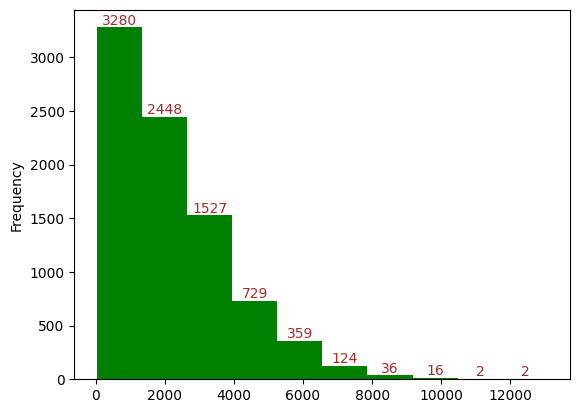

In [442]:
ax=sales_train.Item_Outlet_Sales.plot(kind="hist",color="green")
for i in ax.containers:
    ax.bar_label(i,color="brown")

<Axes: ylabel='Density'>

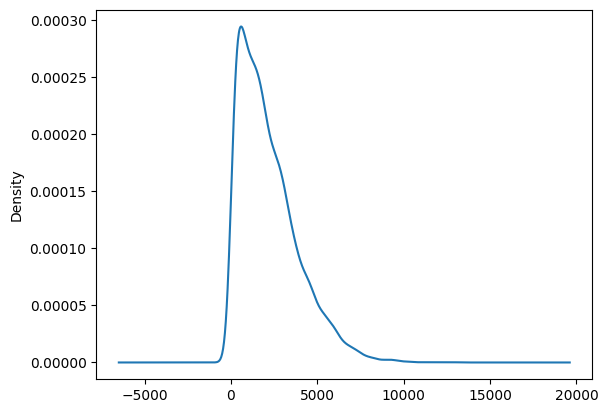

In [443]:
sales_train.Item_Outlet_Sales.plot(kind="density")

<Axes: >

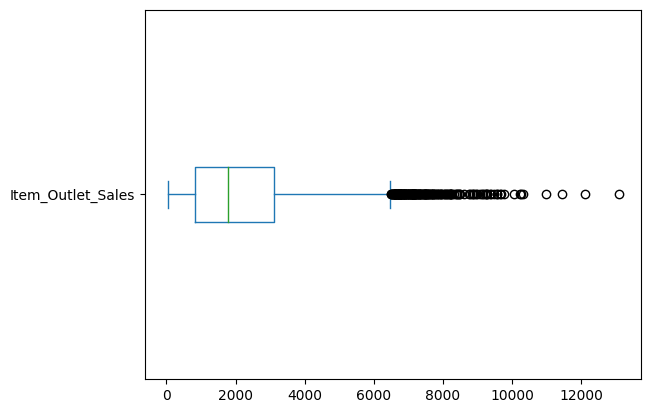

In [444]:
sales_train.Item_Outlet_Sales.plot(kind="box",vert=False)

<Axes: >

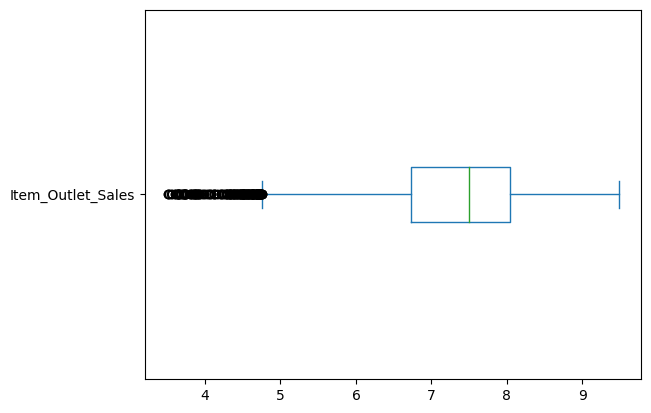

In [445]:
np.log(sales_train.Item_Outlet_Sales).plot(kind="box",vert=False)

<Figure size 3000x1500 with 0 Axes>

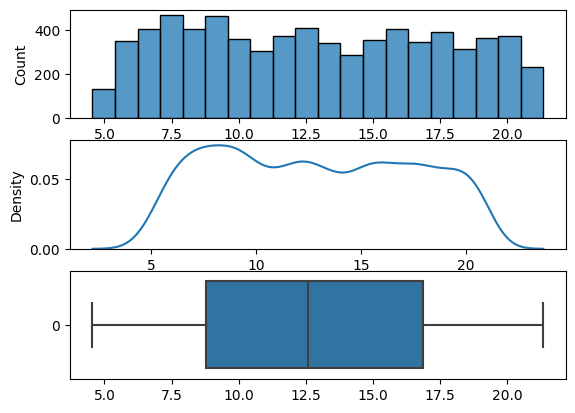

In [446]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(sales_train.Item_Weight,ax=ax[0])
sns.kdeplot(sales_train.Item_Weight,ax=ax[1])
sns.boxplot(sales_train.Item_Weight,orient="h",ax=ax[2])
plt.show()

<Figure size 3000x1500 with 0 Axes>

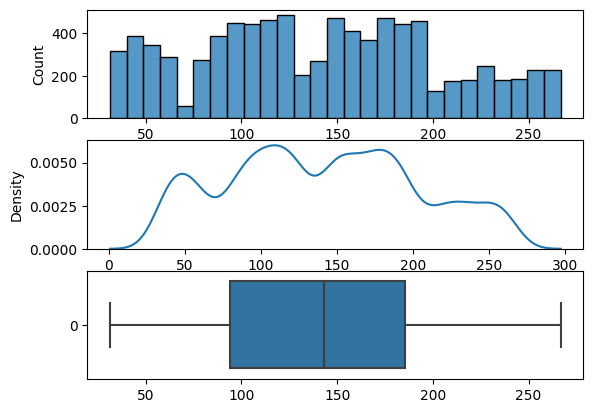

In [447]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(sales_train.Item_MRP,ax=ax[0])
sns.kdeplot(sales_train.Item_MRP,ax=ax[1])
sns.boxplot(sales_train.Item_MRP,orient="h",ax=ax[2])
plt.show()

In [448]:
sales_train.Item_Outlet_Sales.min()

33.29

In [449]:
sales_train.Item_Outlet_Sales.max()

13086.9648

In [450]:
# Frequency Distribution Table
pd.cut(sales_train.Item_Outlet_Sales,bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000]).value_counts().sort_index()

Item_Outlet_Sales
(0, 1000]         2504
(1000, 2000]      2163
(2000, 3000]      1590
(3000, 4000]      1040
(4000, 5000]       597
(5000, 6000]       340
(6000, 7000]       164
(7000, 8000]        75
(8000, 9000]        27
(9000, 10000]       15
(10000, 11000]       5
(11000, 12000]       1
(12000, 13000]       1
(13000, 14000]       1
Name: count, dtype: int64

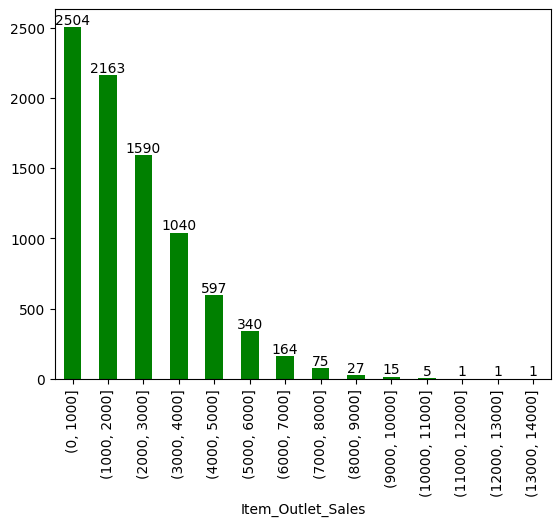

In [451]:
# Bar Plot for Frequency Distribution Table
ax=pd.cut(sales_train.Item_Outlet_Sales,bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000]
         ).value_counts().sort_index().plot(kind="bar",color="green")

for i in ax.containers :
    ax.bar_label(i)
plt.show()

<Axes: >

<Figure size 2000x2000 with 0 Axes>

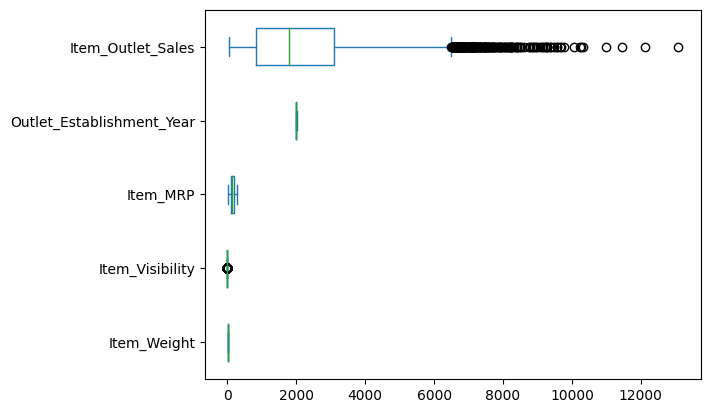

In [452]:
plt.figure(figsize=(20,20))
sales_train.plot(kind="box",vert=False)

In [453]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


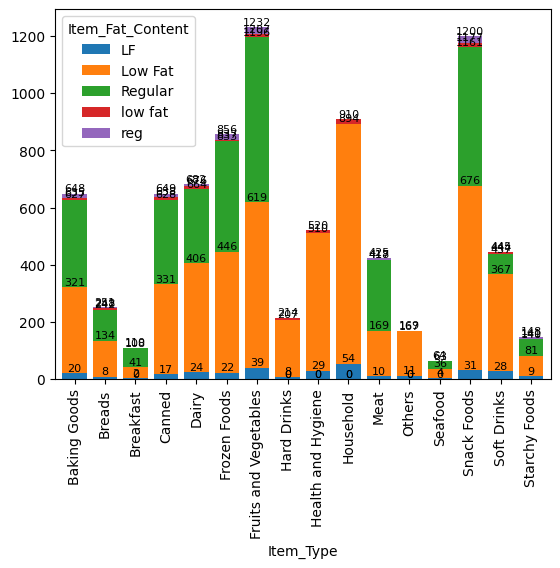

In [454]:
ax=pd.crosstab(sales_train.Item_Type,sales_train.Item_Fat_Content).plot.bar(stacked=True,width=0.8)
for i in ax.containers :
    ax.bar_label(i,fontsize=8)

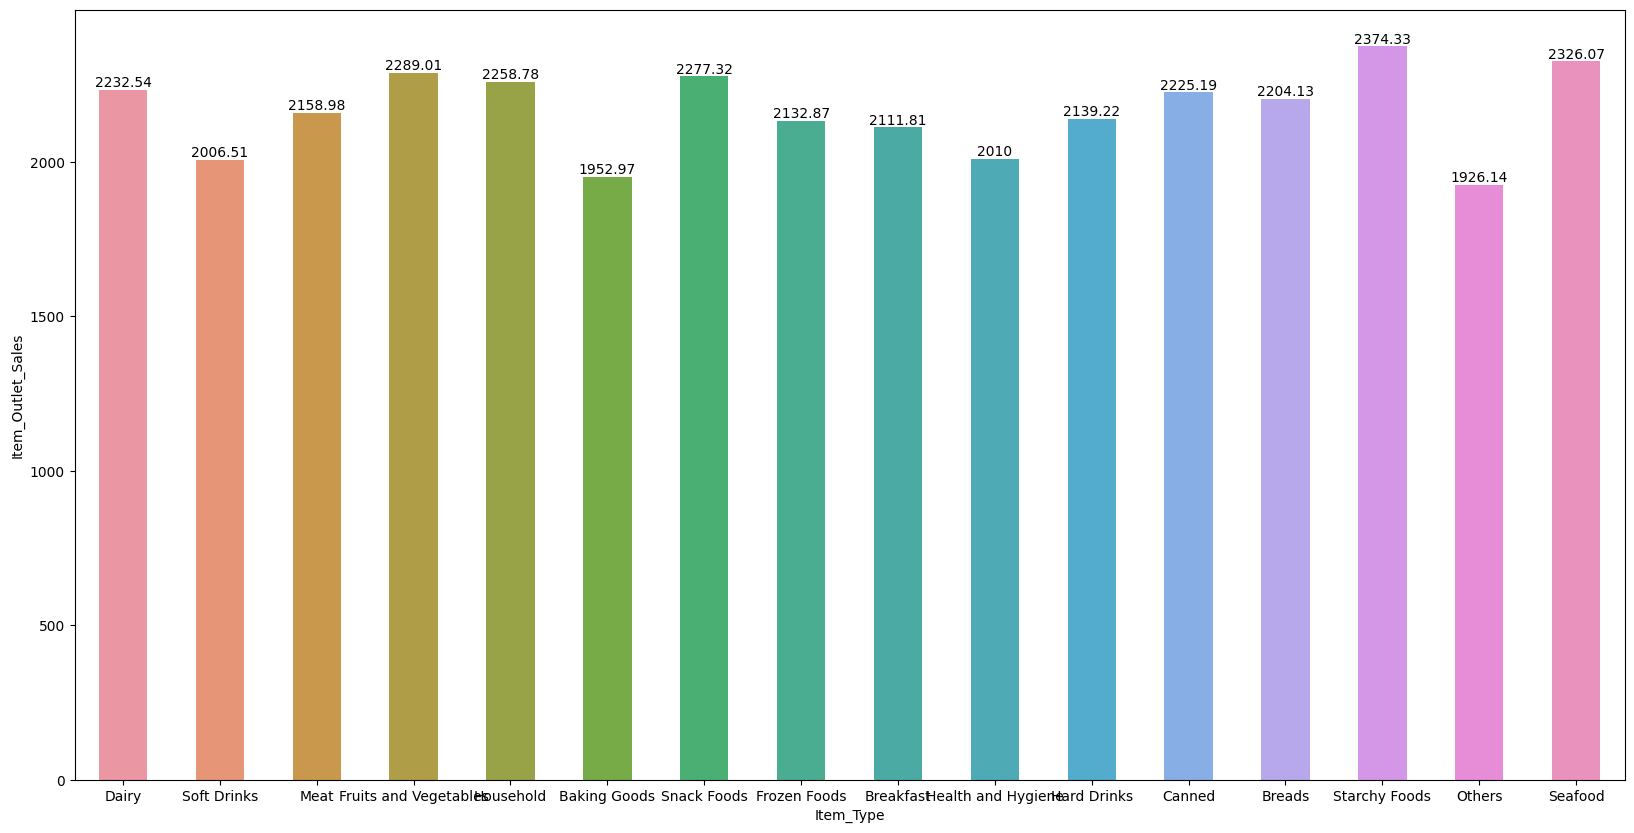

In [455]:
plt.figure(figsize=(20,10))
ax = sns.barplot(sales_train,x="Item_Type",y="Item_Outlet_Sales",errorbar=None,width=0.5, linewidth = 0.7)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='count'>

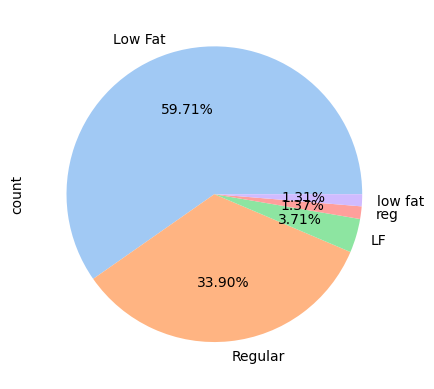

In [456]:
colors = sns.color_palette('pastel')[0:len(sales_train.Item_Fat_Content)]
sales_train.Item_Fat_Content.value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors)

<Axes: ylabel='count'>

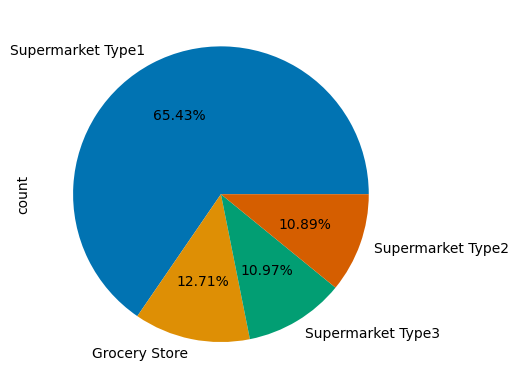

In [457]:
colors = sns.color_palette('colorblind')[0:len(sales_train.Item_Fat_Content)]
sales_train.Outlet_Type.value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors)

In [42]:
#crosstabulation
pd.crosstab(combinedf.Item_code,combinedf.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non-Edible,Regular
Item_code,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [43]:
pd.crosstab(combinedf.Item_Type,combinedf.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non-Edible,Regular
Item_Type,,,
Baking Goods,542,0,544
Breads,222,0,194
Breakfast,66,0,120
Canned,549,0,535
Dairy,691,0,445
Frozen Foods,731,0,695
Fruits and Vegetables,1086,0,927
Hard Drinks,362,0,0
Health and Hygiene,0,858,0


In [44]:
pd.crosstab(combinedf.Outlet_Size,combinedf.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Missing,925,3091,0,0
Small,880,3100,0,0


In [45]:
pd.crosstab(combinedf.Outlet_Type,combinedf.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,880,0,925
Supermarket Type1,3100,4641,1553
Supermarket Type2,0,0,1546
Supermarket Type3,0,0,1559


### Data Aggregation

In [458]:
# What is the Average sales of different items?
sales_train.Item_Outlet_Sales.groupby(sales_train.Item_Type).mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [459]:
# What is the Average price for different item?
sales_train.Item_MRP.groupby(sales_train.Item_Type).mean()

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

### Hypothesis testing

In [86]:
#Hypothesis testing to find if there is a significant difference between Item_Outlet_Sales and Item_code
#groupby mean of  Item_Outlet_Sales and Item_code

salestrain_EDA.Item_Outlet_Sales.groupby(salestrain_EDA.Item_code).mean()

Item_code
DR    1997.333337
FD    2215.354223
NC    2142.721364
Name: Item_Outlet_Sales, dtype: float64

In [87]:
DR=salestrain_EDA[salestrain_EDA.Item_code=="DR"]
FD=salestrain_EDA[salestrain_EDA.Item_code=="FD"]
NC=salestrain_EDA[salestrain_EDA.Item_code=="NC"]

In [88]:
#performing hypothesis testing using one way anova

from scipy.stats import f_oneway

In [89]:
f_oneway(DR.Item_Outlet_Sales,FD.Item_Outlet_Sales,NC.Item_Outlet_Sales)

# Since pvalue=0.0018844050713309338 is less than 0.05, Reject null Hypothesis

#there is significant difference of mean of Item_Outlet_Sales to Item_code

F_onewayResult(statistic=6.278765679145161, pvalue=0.0018844050713309338)

In [90]:
#Hypothesis testing to find if there is a significant difference between Item_Outlet_Sales and Outlet_Location_Type

salestrain_EDA.Item_Outlet_Sales.groupby(salestrain_EDA.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [91]:
T1=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 1"]
T2=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 2"]
T3=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 3"]

In [92]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)

# Since pvalue=5.2228172988842975e-24 is less than 0.05, Reject null Hypothesis

#there is significant difference of mean of Item_Outlet_Sales to Outlet_Location_Type

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [93]:
#To find the relationship between Item_Fat_Content and Item_Type we are doing chi2 test of hypothesis
from scipy.stats import chi2_contingency

In [94]:
chi2_contingency(pd.crosstab(salestrain_EDA.Item_Type,salestrain_EDA.Item_Fat_Content))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Item_Fat_Content and Item_Type

Chi2ContingencyResult(statistic=9022.40827631828, pvalue=0.0, dof=30, expected_freq=array([[297.88384372, 121.57127772, 228.54487856],
       [115.38401971,  47.09010912,  88.52587117],
       [ 50.56670187,  20.63709961,  38.79619852],
       [298.34354101, 121.75888772, 228.89757128],
       [313.51355157, 127.9500176 , 240.53643083],
       [393.50087997, 160.59415699, 301.90496304],
       [566.34706089, 231.13551566, 434.51742344],
       [ 98.37521999,  40.14853925,  75.47624076],
       [239.04259064,  97.55719817, 183.40021119],
       [418.32453361, 170.7250968 , 320.95036959],
       [195.37134812,  79.7342485 , 149.89440338],
       [ 77.68884196,  31.70608941,  59.60506864],
       [ 29.42062654,  12.00703977,  22.57233369],
       [551.63674762, 225.13199578, 423.2312566 ],
       [204.56529391,  83.48644843, 156.94825766],
       [ 68.03519887,  27.76627948,  52.19852165]]))

In [95]:
#To find the relationship between Outlet_Size and Outlet_Type we are doing chi2 test of hypothesis

chi2_contingency(pd.crosstab(salestrain_EDA.Outlet_Size,salestrain_EDA.Outlet_Type))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Outlet_Size and Outlet_Type

Chi2ContingencyResult(statistic=5380.286956123781, pvalue=0.0, dof=9, expected_freq=array([[ 118.42731433,  609.85146075,  101.47788337,  102.24334155],
       [ 354.90073918, 1827.59134108,  304.10700458,  306.40091517],
       [ 306.23372052, 1576.97641675,  262.40525637,  264.38460636],
       [ 303.43822598, 1562.58078141,  260.00985568,  261.97113692]]))

### Dividing data into numeric columns and object columns

In [460]:
numcols=combine_df.select_dtypes(include=np.number)
objcols=combine_df.select_dtypes(include=['object'])

In [461]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [462]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [463]:
print(numcols.shape)
print(objcols.shape)

(14204, 4)
(14204, 8)


In [464]:
objcols['items_code']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [465]:
objcols.items_code.value_counts(dropna=False)

items_code
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [466]:
objcols=objcols.drop('Item_Identifier',axis=1)

In [467]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'items_code'],
      dtype='object')

In [468]:
# create a new variable "Outlet_Age" from Outlet_establishment_year
numcols["Outlet_Age"]=2022-numcols.Outlet_Establishment_Year

In [469]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [470]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [471]:
numcols=numcols.drop('Outlet_Establishment_Year',axis=1)

In [472]:
numcols.head()# variables are in diff unit sizes - scaling must be done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [473]:
from sklearn.preprocessing import MinMaxScaler

In [474]:
minmax=MinMaxScaler()

In [475]:
numcols_minmax=minmax.fit_transform(numcols)

In [476]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [477]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [478]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales# add it to numeric columns

In [479]:
objcols=objcols.drop('Item_Outlet_Sales',axis=1)# drop it from object columns

In [480]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'items_code'],
      dtype='object')

In [481]:
objcols.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,items_code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [482]:
objcols_dummy=pd.get_dummies(objcols)

In [483]:
objcols_dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,items_code_DR,items_code_FD,items_code_NC
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [484]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [485]:
objcols_dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,items_code_DR,items_code_FD,items_code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [486]:
combine_df_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [487]:
# split data back to train and test
sales_train_df=combine_df_clean[combine_df_clean.Item_Outlet_Sales!="test"]
sales_test_df=combine_df_clean[combine_df_clean.Item_Outlet_Sales=="test"]


In [488]:
#delete Item_Outlet_Sales from sales_test_df
sales_test_df=sales_test_df.drop('Item_Outlet_Sales',axis=1)

In [489]:
print(sales_train_df.shape)
print(sales_test_df.shape)

(8523, 47)
(5681, 46)


In [490]:
sales_train_df.Item_Outlet_Sales = sales_train_df.Item_Outlet_Sales.astype("float64")

C:\Users\srava\AppData\Local\Temp\ipykernel_16924\1239030053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.Item_Outlet_Sales = sales_train_df.Item_Outlet_Sales.astype("float64")


In [491]:
sales_train_df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [492]:
# Histogram, Boxplot and Density Curve of Item_Outlet_Sales

In [497]:
# split data into dependant variable(y) and independent variable(x's)
y=sales_train_df.Item_Outlet_Sales
X=sales_train_df.drop('Item_Outlet_Sales',axis=1)

## Model building

### Linear Regression

In [498]:
from sklearn.linear_model import LinearRegression

In [499]:
reg=LinearRegression()

In [500]:
regmodel=reg.fit(X,y)

In [501]:
regmodel.score(X,y)

0.5637737001510252

##### Logarithmic Transformation

In [502]:
regmodel=reg.fit(X,np.log(y))

In [503]:
regmodel.score(X,np.log(y))

0.7213876943174335

In [504]:
from sklearn.model_selection import cross_val_score

In [505]:
cross_val_score(reg,X,np.log(y))

array([0.7205722 , 0.71009854, 0.70854769, 0.71488665, 0.74006189])

In [506]:
np.mean([0.7205722 , 0.71009854, 0.70854769, 0.71488665, 0.74006189])

0.718833394

In [507]:
regpredict=regmodel.predict(X)

In [508]:
regpredict=np.exp(regpredict)

In [509]:
regresidual=y-regpredict

In [510]:
np.sqrt(np.mean(regresidual**2))# RMSE

1140.0278807236884

### Decision Tree

In [511]:
from sklearn.tree import DecisionTreeRegressor

In [512]:
tree=DecisionTreeRegressor(max_depth=7)

In [513]:
treemodel=tree.fit(X,y)

In [514]:
treemodel.score(X,y)

0.6222214278266509

In [515]:
cross_val_score(tree,X,y)

array([0.5923785 , 0.55850915, 0.5622274 , 0.59065396, 0.59154169])

In [516]:
np.mean([0.59238053, 0.56594504, 0.56223224, 0.5908948 , 0.59149575])

0.5805896720000001

In [517]:
treepredict=treemodel.predict(X)

In [518]:
treeresidual=y-treepredict

In [519]:
np.sqrt(np.mean(treeresidual**2))# RMSE

1048.8161737070802

### Random Forest 

In [520]:
from sklearn.ensemble import RandomForestRegressor

In [673]:
rf=RandomForestRegressor(n_estimators=2000,max_depth=7)

In [674]:
rfmodel=rf.fit(X,y)

In [675]:
rfmodel.score(X,y)

0.6360153754849458

In [676]:
cross_val_score(rf,X,y)

array([0.60711577, 0.58242455, 0.57375145, 0.59982067, 0.6066908 ])

In [677]:
np.mean([0.60711577, 0.58242455, 0.57375145, 0.59982067, 0.6066908 ])

0.593960648

In [678]:
rfpredict=rfmodel.predict(X)

In [679]:
rfresidual=y-rfpredict

In [680]:
np.sqrt(np.mean(rfresidual**2))#RMSE

1029.4902426298531

### Gradient Boosting

In [532]:
from sklearn.ensemble import GradientBoostingRegressor

In [784]:
gbr=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1)

In [785]:
gbrmodel=gbr.fit(X,y)

In [786]:
gbrmodel.score(X,y)

0.6527559957141327

In [787]:
cross_val_score(gbr,X,y)

array([0.60516726, 0.5709949 , 0.56681656, 0.59100224, 0.59194676])

In [788]:
np.mean([0.60516726, 0.5709949 , 0.56681656, 0.59100224, 0.59194676])

0.585185544

In [789]:
gbrpredict=gbrmodel.predict(X)

In [790]:
gbrresidual=y-gbrpredict

In [791]:
np.sqrt(np.mean(gbrresidual**2))#RMSE

1005.5370873838601

### Support Vector Machine(SVM)

In [555]:
from sklearn.svm import LinearSVR

In [799]:
lsvr=LinearSVR(C=300)

In [800]:
lsvrmodel=lsvr.fit(X,np.log(y))

C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [801]:
lsvrmodel.score(X,np.log(y))

0.6823778581399746

In [804]:
cross_val_score(lsvr,X,np.log(y))

C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

array([0.61332118, 0.6634797 , 0.57877156, 0.65940898, 0.56111927])

In [805]:
np.mean([0.61332118, 0.6634797 , 0.57877156, 0.65940898, 0.56111927])

0.615220138

In [806]:
lsvrpredict=lsvrmodel.predict(X)

In [807]:
lsvrpredict=np.exp(lsvrpredict)

In [808]:
lsvrresidual=y-lsvrpredict

In [809]:
np.sqrt(np.mean(lsvrresidual**2))# RMSE

1458.7517680542112

### KNN 

In [642]:
from sklearn.neighbors import KNeighborsRegressor

In [665]:
knn = KNeighborsRegressor(n_neighbors=9)

In [666]:
knnmodel=knn.fit(X,y)

In [667]:
knnmodel.score(X,y)

0.6142563409302718

In [668]:
cross_val_score(knn,X,y)

array([0.51364608, 0.47977081, 0.46358895, 0.53532832, 0.51851171])

In [669]:
np.mean([0.51364608, 0.47977081, 0.46358895, 0.53532832, 0.51851171])

0.5021691739999999

In [670]:
knnpredict = knnmodel.predict(X)

In [671]:
knnresidual = y - knnpredict

In [672]:
np.sqrt(np.mean(knnresidual**2))

1059.815125550761

## Lasso :

In [681]:
from sklearn.linear_model import Lasso

In [826]:
las = Lasso(alpha=1)

In [827]:
lasmodel = las.fit(X,y)

In [828]:
lasmodel.score(X,y)

0.5635796274012772

In [829]:
cross_val_score(las,X,y)

array([0.57024116, 0.55297298, 0.54689474, 0.56570091, 0.56408189])

In [830]:
np.mean([0.57024116, 0.55297298, 0.54689474, 0.56570091, 0.56408189])

0.559978336

In [831]:
laspredict = lasmodel.predict(X)

In [832]:
lasresid = y-laspredict

In [833]:
np.sqrt(np.mean(lasresid**2))

1127.283689764665

# ridge

In [722]:
from sklearn.linear_model import Ridge

In [747]:
rid = Ridge()

In [748]:
ridmodel = rid.fit(X,y)

In [749]:
ridmodel.score(X,y)

0.5637734971241395

In [750]:
cross_val_score(rid,X,y)

array([0.56965934, 0.55180204, 0.54580711, 0.56341224, 0.56322636])

In [751]:
np.mean([0.56965934, 0.55180204, 0.54580711, 0.56341224, 0.56322636])

0.558781418

In [752]:
ridpredict = ridmodel.predict(X)

In [753]:
ridresid = y-ridpredict

In [754]:
np.sqrt(np.mean(ridresid**2))

1127.0332770128016

# Elastic net

In [755]:
from sklearn.linear_model import ElasticNet

In [868]:
en = ElasticNet(alpha=1,l1_ratio=1)

In [869]:
en_model = en.fit(X,y)

In [870]:
en_model.score(X,y)

0.5635796274012772

In [871]:
cross_val_score(en,X,y)

array([0.57024116, 0.55297298, 0.54689474, 0.56570091, 0.56408189])

In [872]:
np.mean([0.57024116, 0.55297298, 0.54689474, 0.56570091, 0.56408189])

0.559978336

In [873]:
en_predict = en_model.predict(X)

In [874]:
en_residual = y - en_predict

In [875]:
np.sqrt(np.mean(en_residual**2))

1127.283689764665

# Summary

After building and evaluating various machine learning models for Big Mart sales dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

| Model Name | R_square| RMSE |
|--|--|--|
| Linear Regression |0.7213876943174335|1140.0278807236884 | 
| Decision Tree | 0.6222214278266509  | 1048.8161737070802 |
| Random Forest | 0.6360153754849458 | 1029.4902426298531 |
| **Gradient Boosting Machine** | **0.6527559957141326** | **1005.5370873838602**|
| Support Vector Machine | 0.6461748184592925  | 1746.2179461934236 |
| k-nearest neighbors | 0.6142563409302718  | 1059.815125550761 |
| Lasso Regression | 0.5635796274012772 | 1127.283689764665 |
| Ridge Regression | 0.5637734971241395 | 1127.0332770128016 | 
| Elastic Net | 0.5635796274012772 | 1127.283689764665 |

The "Gradient Boosting Machine" model stands out with a significantly lower RMSE score compared to its counterparts, indicating its superior predictive performance for this dataset. The lower RMSE value suggests that the Gradient Boosting Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Gradient Boosting Machine model as a more reliable option for regression analysis on used cars Prices dataset, prioritizing RMSE as the key performance indicator scores.